
# Project: No-show appointments Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We are going to analyze the dataset "No-show appointments". It is a dataset of medical appointments in Brazil, where the the question is if a patient show up for their appointments or not.

>We are going to look for any relation between no show up to their appointments and others variables.

>First, we will see the distribution of ages in the dataset and the mean age of the people that no show up and show up to their appointment to see if has any relation. 

>After that the same for gender, hipertension, diabetes, alcoholism, scholarship and finally we will perform an analysis of the difference days between appointment day and the scheduled day and SMS received by the patient.

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#visualizations plots
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Dictionary

PatientId - Identification of a patient.

AppointmentID - Identification of each appointment.

Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. 

ScheduledDay - tells us on what day the patient set up their appointment.

AppointmentDay - The day of the actuall appointment, when they have to visit the doctor.

Age = How old is the patient. 

Neighbourhood = Where the appointment takes place, indicates the location of the hospital.

Scholarship = True of False . Observation, indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

Hipertension = True or False 

Diabetes = True or False 

Alcoholism = True or False 

Handcap = True or False 

SMS_received = 1 or more messages sent to the patient. 

No-show = True or False.

>I remove 'AppointmentID' because this column do not give any information.

In [3]:
#Remove AppointmentID 
df.drop(['AppointmentID'], axis = 1, inplace=True)

In [4]:
#Number of rows and columns
df.shape

(110527, 13)

In [5]:
#Number of uniques values for each column
df.nunique()

PatientId          62299
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 8.9+ MB


All the rows have values, there is no missing values.

'No-Show': It is a string, we are going to change: True: 1 and False: 0. Also change the name to No_show.

In [7]:
#No-show: change of name because problemas con query
df.rename(columns={'No-show': 'No_show'}, inplace=True)

In [8]:
#Change of values True: 1 and False: 0
df['No_show'] = df['No_show'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [10]:
df.PatientId.nunique()

62299

In [11]:
df['PatientId'].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

'PatientId' is not eliminated because perhaps there is there is a relation with 'No-Show'. We are going to convert to a string type because it is an "identification" number and do not give us a numerical information. 

In [12]:
df.PatientId.astype(str)

0          29872499824296.0
1         558997776694438.0
2           4262962299951.0
3            867951213174.0
4           8841186448183.0
5          95985133231274.0
6         733688164476661.0
7           3449833394123.0
8          56394729949972.0
9          78124564369297.0
10        734536231958495.0
11          7542951368435.0
12        566654781423437.0
13        911394617215919.0
14         99884723334928.0
15            99948393975.0
16         84574392942817.0
17         14794966191172.0
18         17135378245248.0
19          7223289184215.0
20        622257462899397.0
21         12154843752835.0
22        863229818887631.0
23        213753979425692.0
24          8734857996885.0
25          5819369978796.0
26            25787851512.0
27         12154843752835.0
28          5926171692527.0
29          1225776163665.0
                ...        
110497    793589177751417.0
110498     94336536145654.0
110499    821969177626116.0
110500    443438443334614.0
110501       4544251

Change Gender column to a numeric values Male:1 and Female:0

In [13]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == "M" else 0)

>Conversion of ScheduledDay and AppointmentDay to date.

In [14]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Creation a column to show the difference of days between AppointmentDay and ScheduledDay. We take the absolute value because some values are negatives and perhaps the dates have been exchanged.

In [15]:
df['Diff_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Diff_days
0,2.987250e+13,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5.589978e+14,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4.262962e+12,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,8.679512e+11,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8.841186e+12,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


In [16]:
df.describe()

,PatientId,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Diff_days
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,9.183702
std,2.560949e+14,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,3.921784e+04,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.172614e+12,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.173184e+13,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,9.999816e+14,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


Mean of people that no go to the appoiment with the doctor is ***20%***

In [17]:
#Check if null values in data
df.isnull().sum()

PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
Diff_days         0
dtype: int64

In [18]:
df.nunique()

PatientId          62299
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No_show                2
Diff_days            131
dtype: int64

'Handcap': we see that have 5 differents values.

In [19]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handcap is 0 False or 1 True, I'll convert the values 2,3 and 4 to 1 

In [20]:
df['Handcap'] = df['Handcap'].apply(lambda x: 1 if x >= 1 else 0)

In [21]:
#check that Handcap has only two possible values
df['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

### Data Cleaning

We are going to check if there are duplicated rows

In [22]:
#duplicated rows  
df.duplicated().sum()

618

In [23]:
#Show duplicated rows
df[df.duplicated(keep=False)]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Diff_days
153,1.925263e+10,0,2016-04-28 16:38:34,2016-04-29,30,ITARARÉ,0,0,0,0,0,0,0,0
154,1.925263e+10,0,2016-04-28 16:38:34,2016-04-29,30,ITARARÉ,0,0,0,0,0,0,0,0
368,4.341600e+14,0,2016-04-29 09:43:15,2016-04-29,39,PRAIA DO CANTO,0,0,0,0,0,0,0,-1
369,4.341600e+14,0,2016-04-29 09:43:15,2016-04-29,39,PRAIA DO CANTO,0,0,0,0,0,0,0,-1
370,4.497415e+09,0,2016-04-19 11:16:27,2016-04-29,11,BELA VISTA,0,0,0,0,0,0,0,9
371,4.497415e+09,0,2016-04-19 11:16:27,2016-04-29,11,BELA VISTA,0,0,0,0,0,0,0,9
465,5.161239e+12,0,2016-04-27 13:16:02,2016-04-29,49,CONSOLAÇÃO,0,0,0,0,0,0,0,1
466,5.161239e+12,0,2016-04-27 13:16:02,2016-04-29,49,CONSOLAÇÃO,0,0,0,0,0,0,0,1
553,4.916356e+12,1,2016-03-29 12:40:26,2016-04-29,40,CENTRO,0,0,0,0,0,0,1,30
554,4.916356e+12,1,2016-03-29 12:40:26,2016-04-29,40,CENTRO,0,0,0,0,0,0,1,30


I going to eliminate the duplicated rows

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.shape

(109909, 14)

'Age': we have seen the minimum value -1 and maximum 115. Let`s see others values.

In [26]:
df.Age.value_counts()

 0      3530
 1      2271
 52     1738
 49     1645
 53     1641
 38     1624
 56     1623
 2      1616
 59     1614
 50     1601
 57     1597
 36     1567
 51     1561
 19     1533
 39     1525
 54     1523
 34     1518
 33     1516
 37     1516
 6      1512
 3      1509
 30     1505
 17     1498
 32     1488
 5      1482
 44     1474
 18     1474
 58     1459
 46     1451
 45     1450
        ... 
 74      601
 76      570
 78      541
 75      540
 77      525
 80      509
 81      430
 82      391
 79      389
 84      310
 83      278
 85      274
 86      256
 87      184
 89      172
 88      125
 90      109
 92       84
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       4
 100       3
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

We can consider right values over 100, but -1 and 0 wil be removed (age >= 1).

In [27]:
#Select all the rows with Age >=1
df = df[df.Age >= 1]

In [28]:
#Check the number of rows
df.shape[0]

106378

We have seen that 'Diff_days' have negatives values.

In [29]:
#Count the differentes values of 'Diff_days'
df['Diff_days'].value_counts().sort_index()

-7          1
-2          4
-1      37089
 0       4977
 1       6609
 2       2614
 3       5192
 4       3183
 5       3928
 6       4742
 7       2226
 8       1553
 9       1347
 10       940
 11      1067
 12      1615
 13      2792
 14      1429
 15      1102
 16      1071
 17       994
 18       999
 19      1137
 20      1777
 21      1133
 22       784
 23       602
 24       615
 25       708
 26       968
        ...  
 100        1
 101        4
 102        4
 103        8
 104        4
 106        2
 107        5
 108        5
 109        2
 110        3
 111        5
 114        2
 116        1
 118        4
 121        3
 122        1
 124        1
 125        1
 126        1
 131        1
 132       11
 138        1
 141        8
 145        1
 150        1
 154       10
 161       11
 168        8
 175       16
 178       10
Name: Diff_days, Length: 131, dtype: int64

We are going to consider the negatives values incorrects, because these values must be positive.

In [30]:
#we take only values of 'Diff_days' >= 0
df = df[df.Diff_days >= 0]

In [31]:
#check number of rows
df.shape[0]

69284

<a id='eda'></a>
## Exploratory Data Analysis


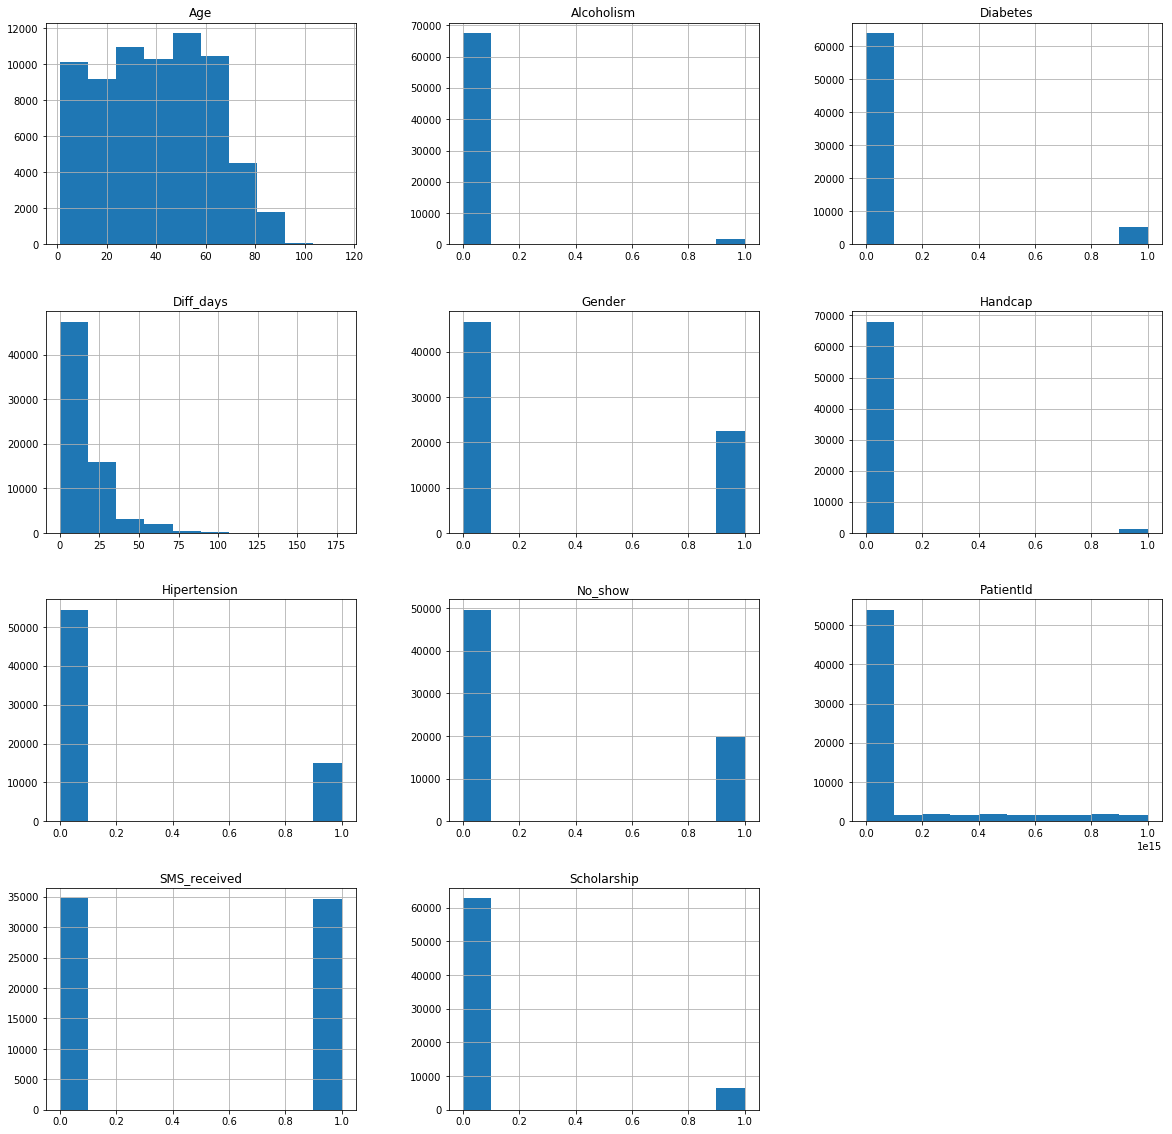

In [32]:
# See the histogram of each column
df.hist(figsize = (20, 20));

***1)***  Analysis relation No-show and age

In [33]:
no_show_true = df.No_show == 1
no_show_false= df.No_show == 0

In [34]:
df.Age[no_show_true].mean()

35.8344229892048

In [35]:
df.Age[no_show_false].mean()

41.225980263556195

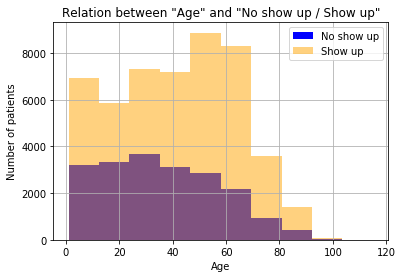

In [36]:
df.Age[no_show_true].hist(label = 'No show up', color = 'blue') #bins = 50
df.Age[no_show_false].hist(alpha= 0.5,label = 'Show up', color = 'orange')#bins = 50
plt.title('Relation between "Age" and "No show up / Show up"')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend();

We see that there is no relation between the age and No-show.

***2)***  Analysis Gender vs No_show

In [37]:
df.groupby('Gender').No_show.mean()

Gender
0    0.283948
1    0.286510
Name: No_show, dtype: float64

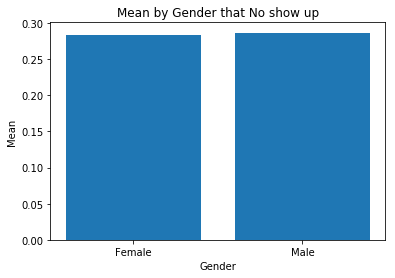

In [38]:
heights = df.groupby('Gender').No_show.mean()
locations = [1, 2] 
labels = ['Female', 'Male']
plt.bar(locations, heights, tick_label=labels)
plt.ylabel('Mean')
plt.xlabel('Gender')
plt.title('Mean by Gender that No show up');

In [39]:
df.groupby(['Gender', 'No_show']).describe()

Age                                                      \
                  count       mean        std  min   25%   50%   75%    max   
Gender No_show                                                                
0      0        33416.0  42.556859  21.294873  1.0  26.0  44.0  59.0  115.0   
       1        13251.0  37.152064  20.652738  1.0  21.0  35.0  53.0  115.0   
1      0        16137.0  38.470038  24.290311  1.0  14.0  40.0  58.0  100.0   
       1         6480.0  33.139969  22.708240  1.0  12.0  32.0  51.0   95.0   

               Alcoholism           ...  SMS_received      Scholarship  \
                    count      mean ...           75%  max       count   
Gender No_show                      ...                                  
0      0          33416.0  0.012778 ...           1.0  1.0     33416.0   
       1          13251.0  0.021432 ...           1.0  1.0     13251.0   
1      0          16137.0  0.047531 ...           1.0  1.0     16137.0   
       1           6480.0  0.050617 ...           1.0  1.0      6480.0   

                                                             
                    mean       std  min  25%  50%  75%  max  
Gender No_show                                               
0      0        0.106296  0.308221  0.0  0.0  0.0  0.0  1.0  
       1        0.146706  0.353826  0.0  0.0  0.0  0.0  1.0  
1      0        0.045547  0.208508  0.0  0.0  0.0  0.0  1.0  
       1        0.055710  0.229378  0.0  0.0  0.0  0.0  1.0  

[4 rows x 72 columns]

In [40]:
#count the number of each gender
df.Gender.value_counts()

0    46667
1    22617
Name: Gender, dtype: int64

In [41]:
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
0       0          33416
        1          13251
1       0          16137
        1           6480
Name: No_show, dtype: int64

In the plot appears that males and females have aproximatly the same mean of 'No-show' and so there is no relation between 'Gender' and 'No-show'.

***3)***  Analysis Hipertension vs No_show

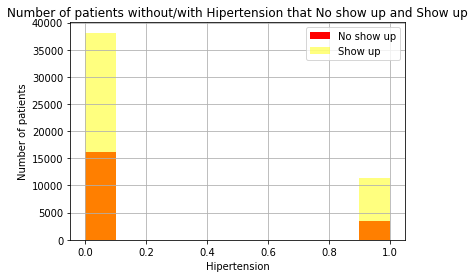

In [42]:
df.Hipertension[no_show_true].hist(label = 'No show up', color = 'red') 
df.Hipertension[no_show_false].hist(alpha= 0.5,label = 'Show up', color = 'yellow')
plt.ylabel('Number of patients')
plt.xlabel('Hipertension')
plt.title('Number of patients without/with Hipertension that No show up and Show up')
plt.legend();

In [43]:
df.groupby('Hipertension').No_show.mean()

Hipertension
0    0.298694
1    0.234120
Name: No_show, dtype: float64

The same situation we see that there is no relation between 'Hipertension' and 'No-show'.

***4)***  Analysis of relation with diabetes

In [44]:
df.groupby('Diabetes').No_show.mean()

Diabetes
0    0.28770
1    0.24986
Name: No_show, dtype: float64

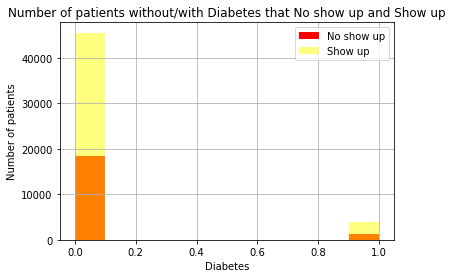

In [45]:
df.Diabetes[no_show_true].hist(label = 'No show up', color = 'red')
df.Diabetes[no_show_false].hist(alpha= 0.5,label = 'Show up', color = 'yellow')
plt.ylabel('Number of patients')
plt.xlabel('Diabetes')
plt.title('Number of patients without/with Diabetes that No show up and Show up')
plt.legend();

There is no relation between 'Diabetes' and 'No-show'

***5)***  Analysis Alcoholism vs No_show

In [46]:
df.groupby('Alcoholism').No_show.mean()

Alcoholism
0    0.283337
1    0.338870
Name: No_show, dtype: float64

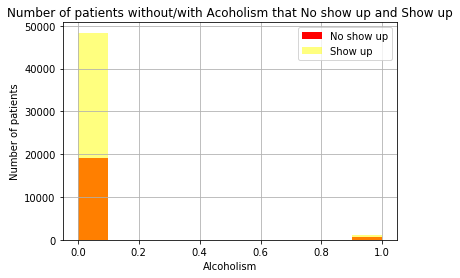

In [47]:
df.Alcoholism[no_show_true].hist(label = 'No show up', color = 'red') #bins = 50
df.Alcoholism[no_show_false].hist(alpha= 0.5,label = 'Show up', color = 'yellow')#bins = 50
plt.ylabel('Number of patients')
plt.xlabel('Alcoholism')
plt.title('Number of patients without/with Acoholism that No show up and Show up')
plt.legend();

There is no relation between 'Alcoholism' and 'No-show'

***6)***  Scholarship vs No_show

In [48]:
df.groupby('Scholarship').No_show.mean()

Scholarship
0    0.277962
1    0.349666
Name: No_show, dtype: float64

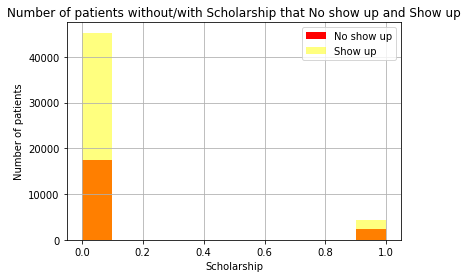

In [49]:
df.Scholarship[no_show_true].hist(label = 'No show up', color = 'red') #bins = 50
df.Scholarship[no_show_false].hist(alpha= 0.5,label = 'Show up', color = 'yellow')#bins = 50
plt.ylabel('Number of patients')
plt.xlabel('Scholarship')
plt.title('Number of patients without/with Scholarship that No show up and Show up')
plt.legend();

There is no relation between 'Scholarship' and 'No-show'

***7)***  Analysis Diff_days vs No_show

In [50]:
df.describe()

,PatientId,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Diff_days
count,6.928400e+04,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000
mean,1.450985e+14,0.326439,39.690549,0.095145,0.215403,0.077060,0.026067,0.018605,0.499177,0.284784,14.566336
std,2.533652e+14,0.468913,22.259240,0.293417,0.411105,0.266688,0.159335,0.135125,0.500003,0.451315,16.522510
min,3.921784e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.965540e+12,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.990562e+13,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,9.365064e+13,1.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.000000
max,9.999320e+14,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


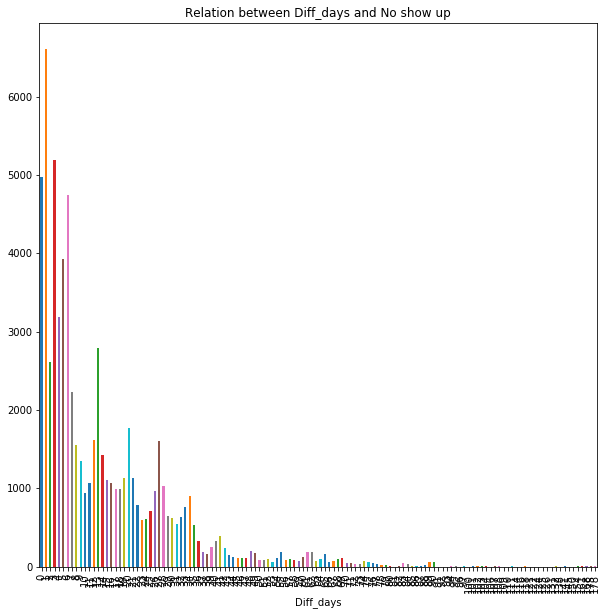

In [51]:
df.groupby('Diff_days')['No_show'].count().plot(kind = 'bar',figsize=(10, 10), title = 'Relation between Diff_days and No show up');

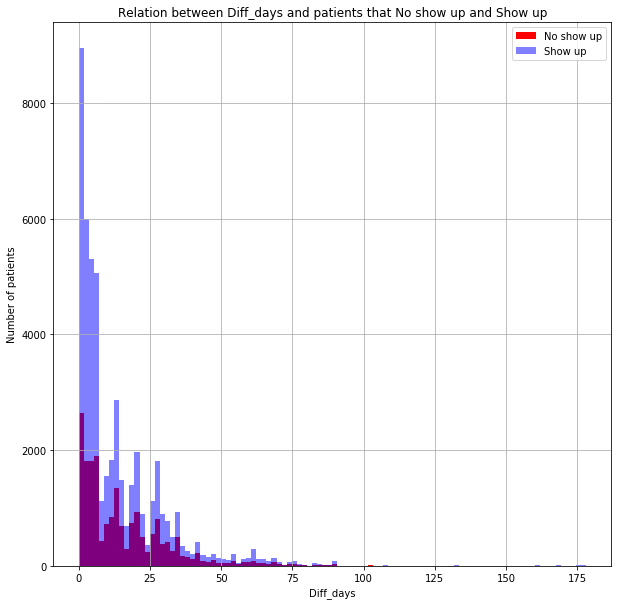

In [52]:
df.Diff_days[no_show_true].hist(label = 'No show up', color = 'red', bins = 100, figsize = (10, 10))
df.Diff_days[no_show_false].hist(alpha= 0.5,label = 'Show up', color = 'blue', bins = 100, figsize = (10, 10))
plt.ylabel('Number of patients')
plt.xlabel('Diff_days')
plt.title('Relation between Diff_days and patients that No show up and Show up')
plt.legend();

We can see that when the appointment is taken with one or few days there is a high probabilty of show up to the appointment (mainly the same day and one day) 

The 50% of the appointments are taken 8 days before and the 75% are taken 21 days before.

We are going to see closer the 21 days

In [53]:
d_diff21 = df.query('Diff_days <=21')

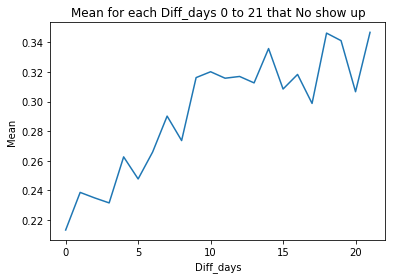

In [54]:
d_diff21.groupby('Diff_days')['No_show'].mean().plot(kind = 'line')
plt.ylabel('Mean')
plt.xlabel('Diff_days')
plt.title('Mean for each Diff_days 0 to 21 that No show up');

Now we are going to look since the day 22 in advance.

In [55]:
d_diff22up = df.query('Diff_days >=22')

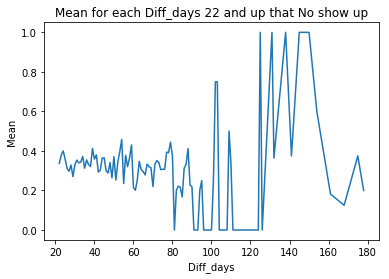

In [56]:
d_diff22up.groupby('Diff_days')['No_show'].mean().plot(kind = 'line')
plt.ylabel('Mean')
plt.xlabel('Diff_days')
plt.title('Mean for each Diff_days 22 and up that No show up');

In this period there is an erratic oscilation.

Let's now see the relation between SMS and 'No_show'

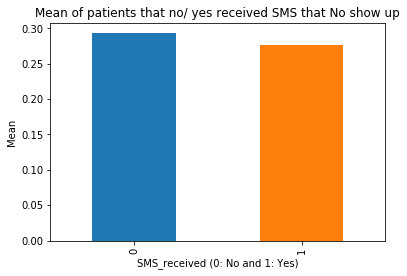

In [57]:
df.groupby('SMS_received')['No_show'].mean().plot(kind = 'bar' )
plt.ylabel('Mean')
plt.xlabel('SMS_received (0: No and 1: Yes)')
plt.title('Mean of patients that no/ yes received SMS that No show up');

We are going to see if there is a relation between "Diff_days" with 'SMS_received'and 'No-show'. What happend to the people that call various days before the appointment and received and SMS?

In [58]:
df.groupby(['Diff_days','SMS_received']).count()

PatientId  Gender  ScheduledDay  AppointmentDay   Age  \
Diff_days SMS_received                                                          
0         0                  4977    4977          4977            4977  4977   
1         0                  6609    6609          6609            6609  6609   
2         0                  1729    1729          1729            1729  1729   
          1                   885     885           885             885   885   
3         0                  2174    2174          2174            2174  2174   
          1                  3018    3018          3018            3018  3018   
4         0                  1166    1166          1166            1166  1166   
          1                  2017    2017          2017            2017  2017   
5         0                  1282    1282          1282            1282  1282   
          1                  2646    2646          2646            2646  2646   
6         0                  1935    1935          1935            1935  1935   
          1                  2807    2807          2807            2807  2807   
7         0                   832     832           832             832   832   
          1                  1394    1394          1394            1394  1394   
8         0                   566     566           566             566   566   
          1                   987     987           987             987   987   
9         0                   663     663           663             663   663   
          1                   684     684           684             684   684   
10        0                   472     472           472             472   472   
          1                   468     468           468             468   468   
11        0                   425     425           425             425   425   
          1                   642     642           642             642   642   
12        0                   613     613           613             613   613   
          1                  1002    1002          1002            1002  1002   
13        0                  1136    1136          1136            1136  1136   
          1                  1656    1656          1656            1656  1656   
14        0                   535     535           535             535   535   
          1                   894     894           894             894   894   
15        0                   399     399           399             399   399   
          1                   703     703           703             703   703   
...                           ...     ...           ...             ...   ...   
109       0                     1       1             1               1     1   
          1                     1       1             1               1     1   
110       0                     1       1             1               1     1   
          1                     2       2             2               2     2   
111       0                     3       3             3               3     3   
          1                     2       2             2               2     2   
114       1                     2       2             2               2     2   
116       1                     1       1             1               1     1   
118       1                     4       4             4               4     4   
121       0                     1       1             1               1     1   
          1                     2       2             2               2     2   
122       1                     1       1             1               1     1   
124       1                     1       1             1               1     1   
125       0                     1       1             1               1     1   
126       1                     1       1             1               1     1   
131       1                     1       1             1               1     1   
132       0                    11      11            11

We see that since day 2 SMS are received by the patients.

In [59]:
#total of SMS received and no received
df['SMS_received'].value_counts()

0    34699
1    34585
Name: SMS_received, dtype: int64

We see that the number of SMS received and no received are approximatly equal.

In [60]:
yes_SMS = df.SMS_received == 1
no_SMS = df.SMS_received == 0

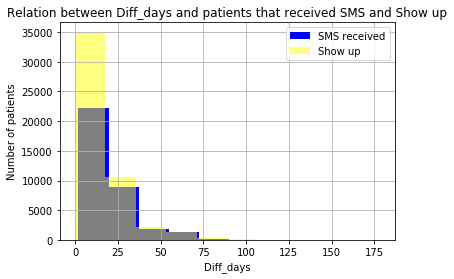

In [61]:
df.Diff_days[yes_SMS].hist(label = 'SMS received', color = 'blue')  
df.Diff_days[no_show_false].hist(alpha= 0.5,label = 'Show up', color = 'yellow') 
plt.ylabel('Number of patients')
plt.xlabel('Diff_days')
plt.title('Relation between Diff_days and patients that received SMS and Show up')
plt.legend();

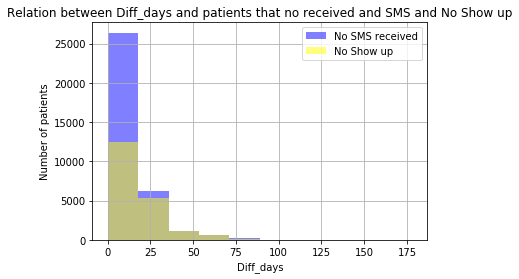

In [62]:
df.Diff_days[no_SMS].hist(alpha= 0.5,label = 'No SMS received', color = 'blue') 
df.Diff_days[no_show_true].hist(alpha= 0.5,label = 'No Show up', color = 'yellow') 
plt.ylabel('Number of patients')
plt.xlabel('Diff_days')
plt.title('Relation between Diff_days and patients that no received and SMS and No Show up')
plt.legend();

Now a closer look between 0 and 21 days.

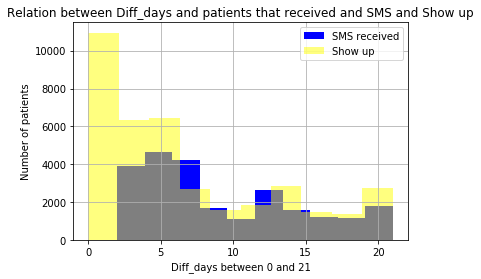

In [63]:
d_diff21.Diff_days[yes_SMS].hist(label = 'SMS received', color = 'blue')  
d_diff21.Diff_days[no_show_false].hist(alpha= 0.5,label = 'Show up', color = 'yellow') 
plt.ylabel('Number of patients')
plt.xlabel('Diff_days between 0 and 21')
plt.title('Relation between Diff_days and patients that received and SMS and Show up')
plt.legend( );

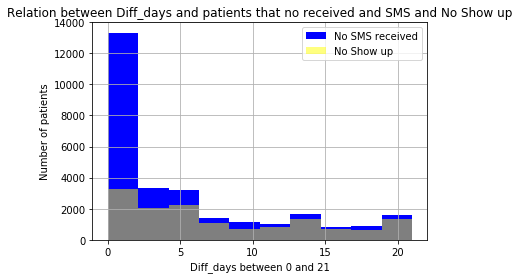

In [64]:
d_diff21.Diff_days[no_SMS].hist(label = 'No SMS received', color = 'blue') 
d_diff21.Diff_days[no_show_true].hist(alpha= 0.5,label = 'No Show up', color = 'yellow') 
plt.ylabel('Number of patients')
plt.xlabel('Diff_days between 0 and 21')
plt.title('Relation between Diff_days and patients that no received and SMS and No Show up')
plt.legend( );

We can see that theres is a relation between the people that have received an SMS days before the appointment and show up for their appointment.

<a id='conclusions'></a>
## Conclusion

> We have analyze the relation of differents variables with 'No-show' but the only relation that we have seen is that all the people that have taken the appointment various days before and they they no receive an SMS to remember the appointment they have a high probability to not show up to their appointment as we have seen in the last graphs.

> At the begining the number of rows was 110527 and after cleaning the data 69284, we lost 41243 rows 37% of the total.
This is a high number of data.

>In this exercise I just took a few number of columns for the analysis, and my doubt is which columns must I take for obtain results. If I would had in the dataset a bigger number of columns? Which columns must I take?

>Another question is if there is a combination of columns that take have a relation with the patient no show up to the appointment and how can I discovered.

> We can recommended to try to send an SMS to all the people with three or more days between tha call and the day of appointment to increase their show up to the appointment.